mossy 0 0 0 spike_recorder-63805-0.dat
[40.3125 20.     30.3125 28.4375 20.     28.4375 23.4375 20.9375 31.5625
 30.9375 20.9375 24.6875 22.8125 17.5    21.5625  8.75   11.875  19.375
 11.875  15.625 ] (20,)
current_frequency [40.3125 20.     30.3125 28.4375 20.     28.4375 23.4375 20.9375 31.5625
 30.9375 20.9375 24.6875 22.8125 17.5    21.5625  8.75   11.875  19.375
 11.875  15.625 ]


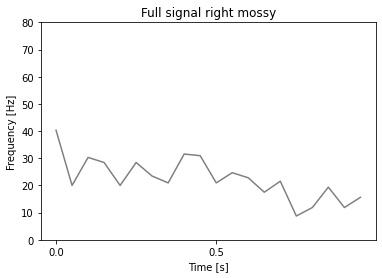

[33.4375 40.9375 33.75   35.625  35.3125 17.5    18.4375 13.75   22.8125
 22.8125] (10,)


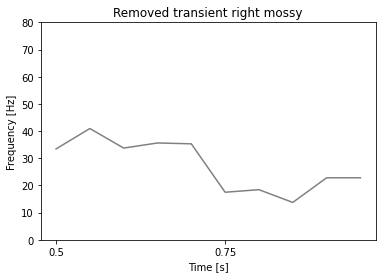

cell_num 64
mossy 0 1 1 spike_recorder-63806-0.dat
[36.66666667 22.72727273 27.87878788 26.96969697 26.06060606 24.84848485
 21.81818182 23.33333333 27.27272727 21.81818182 27.87878788 30.90909091
 24.54545455 16.96969697 20.90909091 12.42424242 13.63636364 18.48484848
 15.15151515 18.48484848] (20,)
current_frequency [36.66666667 22.72727273 27.87878788 26.96969697 26.06060606 24.84848485
 21.81818182 23.33333333 27.27272727 21.81818182 27.87878788 30.90909091
 24.54545455 16.96969697 20.90909091 12.42424242 13.63636364 18.48484848
 15.15151515 18.48484848]


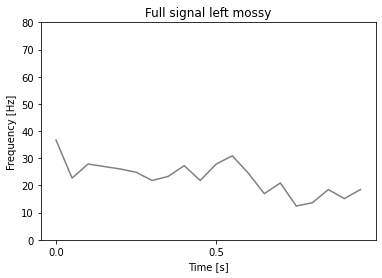

[32.72727273 33.03030303 38.48484848 34.84848485 32.42424242 22.42424242
 22.42424242 17.57575758 27.27272727 21.51515152] (10,)


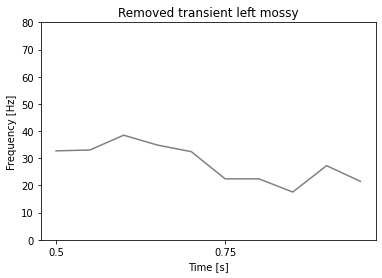

cell_num 66
avg freq {'mossy': [27.4375, 28.27272727272727]}
[27.4375, 28.272727272727273]


In [1]:
# Import packages
from audioop import avg
import pickle
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from examples.tvb_nest.notebooks.cerebellum.scripts.nest_utils import *
#from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *
from examples.tvb_nest.notebooks.cerebellum.utils import  compute_plot_selected_spectra_coherence, only_plot_selected_spectra_coherence_and_diff


cells = ['golgi', 'granule', 'purkinje', 'basket', 'stellate', 'dcn', 'dcn_gaba', 'io', 'glom', 'mossy']
cells = ['mossy']
half = ['right', 'left']

color = {'golgi':'blue', 'granule':'red', 'purkinje':'green', 'basket':'orange', 'stellate':'orange', 'dcn':'black', 'dcn_gaba':'black', 'io':'purple', 'glom':'gray', 'mossy':'gray'}

SIM_DURATION = 1000 #30000
TRANSIENT = 500 #20000
bin_dur = 50     #500

path = 'outputs/0.1_/res/nest_recordings/'
os.chdir(path)
list_files = glob.glob("*.dat")
avg_frequency = {}
values_frequency = {}
nc = 0
for cell in cells:
    nh = 0
    avg_frequency[cells[nc]] = []
    values_frequency[cells[nc]] = []
    for h in half:
        print(cell, nc,nh,nc*2+nh,list_files[nc*2+nh])
        spikes = np.loadtxt(os.getcwd()+"/"+list_files[nc*2+nh],skiprows=3)
        current_frequency, num_bin = compute_frequency_signal(spikes, duration=SIM_DURATION, cutoff=0, bin_dur=bin_dur)
        print("current_frequency", current_frequency)
        plt.plot(current_frequency,color=color[cell])
        plt.title("Full signal "+h+" "+cell)
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [s]')
        plt.ylim([0,80])
        plt.xticks(np.arange(0, num_bin, step=10),map(str, list(np.arange(0,SIM_DURATION*0.001, step = 10*bin_dur*0.001))))
        plt.show()
        current_frequency, num_bin = compute_frequency_signal(spikes, duration=SIM_DURATION, cutoff=TRANSIENT, bin_dur=bin_dur)
        plt.title("Removed transient "+h+" "+cell)
        plt.plot(current_frequency,color=color[cell])
        plt.ylabel('Frequency [Hz]')
        plt.ylim([0,80])
        plt.xlabel('Time [s]')
        plt.xticks(np.arange(0, num_bin, step=5),map(str, list(np.arange(TRANSIENT*0.001,SIM_DURATION*0.001, step = 5*bin_dur*0.001))))
        plt.show()
        avg_frequency[cells[nc]].append(np.mean(current_frequency))
        values_frequency[cells[nc]].append(compute_frequency_value(spikes, duration=SIM_DURATION, cutoff=TRANSIENT))
        
        nh+=1
    nc+=1

print("avg freq",avg_frequency)
print(values_frequency['mossy'])



[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] (11, 2)  mean  [2.745 2.99  3.29  3.58  3.845 4.12  4.395 4.675 4.955 5.21  5.495]


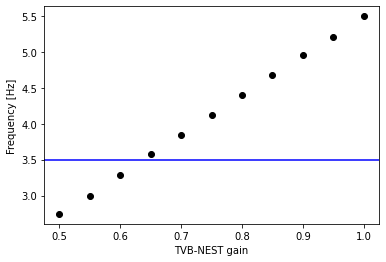

In [2]:
gain = np.arange(0.5, 1.05, step=0.05)
mossy_freq = np.array([[2.68, 2.81],[2.97, 3.01],[3.26, 3.32],[3.58, 3.58],[3.85, 3.84],[4.09, 4.15], [4.42, 4.37],[4.71, 4.64],[4.96, 4.95],[5.28, 5.14],[5.54, 5.45]])
plt.figure()
print(gain, mossy_freq.shape, ' mean ', np.mean(mossy_freq, axis=1))
plt.scatter(gain, np.mean(mossy_freq, axis=1),color='black')
plt.axhline(y = 3.5, color = 'b', linestyle = '-')
plt.ylabel('Frequency [Hz]')
plt.xlabel('TVB-NEST gain')
plt.show()